Los Perceptrones Multicapa son un tipo de red neuronal artificial que extiende el concepto del perceptrón simple para abordar problemas no lineales. A diferencia de su predecesor lineal, el MLP es capaz de aproximar funciones complejas gracias a su arquitectura jerárquica de capas y neuronas.

Desde una perspectiva matemática, un MLP puede entenderse como una composición de funciones vectoriales, donde cada capa transforma su entrada mediante una combinación lineal seguida por una función de activación no lineal. Este proceso se puede describir formalmente como:

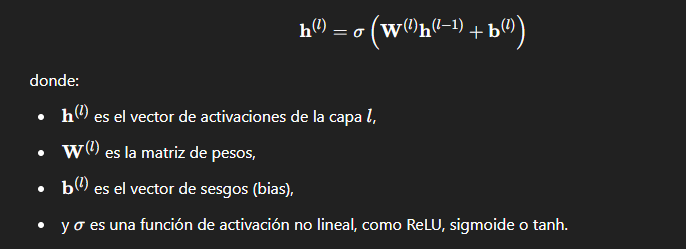

El aprendizaje de un MLP implica ajustar los parámetros
𝑊
(
𝑙
)
W
(l)
  y
𝑏
(
𝑙
)
b
(l)
  mediante algoritmos como backpropagation, utilizando el gradiente del error calculado con respecto a cada parámetro. Esto se realiza a través del cálculo del gradiente descendente, donde se aplica la regla de la cadena para propagar los errores desde la salida hasta las capas anteriores.


#Un Ejemplo En Codigo De Como Funciona PMC y La Propagación Hacia Atras


In [ ]:
import numpy as np

# Definir una función de activación (sigmoide)
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Derivada de la función sigmoide
def sigmoid_derivative(x):
  return x * (1 - x)

# Datos de entrada y salida esperada
input_data = np.array([[0, 0, 1],
                      [0, 1, 1],
                      [1, 0, 1],
                      [1, 1, 1]])

output_data = np.array([[0],
                       [1],
                       [1],
                       [0]])

# Inicializar pesos aleatoriamente
np.random.seed(1)  # Para reproducibilidad
# OJO aca el (3,4) signifca que 3 son la cantidad de variables de entrada, mientras que 4 son la cantidad de neuronas que se quiere
weights0 = 2 * np.random.random((3, 4)) - 1 # pesos de la capa de entrada a la capa oculta
print(weights0)
# OJO 4 aca significa que son 4 neuronas
weights1 = 2 * np.random.random((4, 1)) - 1  # pesos de la capa oculta a la capa de salida

# Hiperparámetros
learning_rate = 0.1
epochs = 10000

# Ciclo de entrenamiento
for epoch in range(epochs):
  # Propagación hacia adelante
  layer0 = input_data
  layer1 = sigmoid(np.dot(layer0, weights0)) #dot es una función para calcular la multiplicación escalar (punto producto) de dos vectores.
  layer2 = sigmoid(np.dot(layer1, weights1))

  # Calcular el error
  layer2_error = output_data - layer2

  # Propagación hacia atrás
  layer2_delta = layer2_error * sigmoid_derivative(layer2)
  layer1_error = layer2_delta.dot(weights1.T)
  layer1_delta = layer1_error * sigmoid_derivative(layer1)

  # Actualizar pesos
  weights1 += layer1.T.dot(layer2_delta) * learning_rate
  weights0 += layer0.T.dot(layer1_delta) * learning_rate

  # Imprimir el error cada 1000 épocas (opcional)
  if epoch % 1000 == 0:
    print(f"Error en la época {epoch}: {np.mean(np.abs(layer2_error))}")

print("Pesos finales de la capa oculta a la salida:\n", weights1)
print("Pesos finales de la entrada a la capa oculta:\n", weights0)
# Se puede predecir con nuevos datos de entrada usando la misma propagación hacia delante


[[ 0.97802303  0.09908945 -0.4371054  -0.84542087]
 [-0.11106101 -0.05438406 -0.902956   -0.6733511 ]
 [-0.76809858  0.25478337  0.7123641   0.30020484]]
Error en la época 0: 13.67138051592766
Error en la época 1000: 13.25009038180446
Error en la época 2000: 13.25004380382628
Error en la época 3000: 13.250028679878572
Error en la época 4000: 13.2500212386694
Error en la época 5000: 13.250016826031972
Error en la época 6000: 13.2500139113731
Error en la época 7000: 13.250011845326224
Error en la época 8000: 13.250010305844766
Error en la época 9000: 13.250009115235908
Error en la época 10000: 13.250008167513304
Error en la época 11000: 13.250007395581953
Error en la época 12000: 13.250006754919966
Error en la época 13000: 13.250006214834226
Error en la época 14000: 13.250005753485338
Error en la época 15000: 13.25000535491438
Error en la época 16000: 13.250005007191355
Error en la época 17000: 13.25000470122114
Error en la época 18000: 13.250004429949936
Error en la época 19000: 13.2500

KeyboardInterrupt: 


#1. import numpy as np

Esto importa la biblioteca NumPy, que es fundamental para realizar operaciones matemáticas con matrices y arrays de manera eficiente en Python. La estamos renombrando como np para que sea más fácil escribir el código.

#2. # Definir una función de activación (sigmoide)

**def sigmoid(x)**

  **return 1 / (1 + np.exp(-x))**  

Esta es la implementación de la función sigmoide. La función sigmoide toma cualquier valor real y lo mapea a un valor entre 0 y 1. Es comúnmente utilizada como función de activación en redes neuronales para introducir no linealidad, lo que permite a la red aprender relaciones complejas en los datos. np.exp(-x) calcula el exponencial negativo de x.

#3. Derivada de la función sigmoide

**def sigmoid_derivative(x)**

  **return x * (1 - x)**
  
Esta es una forma eficiente de calcular la derivada de la función sigmoide cuando la entrada x ya ha pasado por la función sigmoide. Matemáticamente, si y=σ(x), entonces  dx/dy​=y(1−y).

# 4. Datos de entrada y salida esperada

**input_data = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])**

Crea una matriz NumPy llamada input_data. Cada fila representa un ejemplo de entrada. Aquí tenemos 4 ejemplos, cada uno con 3 características. La tercera característica siempre es 1; esto se conoce como el "bias" y se utiliza para permitir que la neurona aprenda un umbral.

**output_data = np.array([[0], [1], [1], [0]])**

Crea una matriz NumPy llamada output_data. Cada fila representa la salida esperada (o etiqueta) correspondiente a la fila de entrada en input_data. Este es un problema de clasificación binaria (la salida es 0 o 1).

# 5. Inicializar pesos aleatoriamente

np.random.seed(1) Establece la semilla aleatoria en 1. Esto es importante para la reproducibilidad. Si ejecutas el código varias veces con la misma semilla, los pesos iniciales aleatorios serán los mismos.

weights0 = 2 * np.random.random((3, 4)) - 1:

Inicializa la matriz de pesos weights0. Esta matriz conecta la capa de entrada (3 neuronas) con la capa oculta (4 neuronas). np.random.random((3, 4)) genera una matriz de números aleatorios entre 0 (inclusive) y 1 (exclusive) con una forma de 3 filas y 4 columnas. Multiplicar por 2 (* 2) escala los valores al rango [0, 2). Restar 1 (- 1) desplaza el rango al intervalo [-1, 1). Inicializar los pesos con valores pequeños y aleatorios ayuda a romper la simetría y facilita el aprendizaje.

weights1 = 2 * np.random.random((4, 1)) - 1

Inicializa la matriz de pesos weights1. Esta matriz conecta la capa oculta (4 neuronas) con la capa de salida (1 neurona). La lógica de la inicialización es la misma que para weights0.

#6.  Hiperparámetros

learning_rate = 0.1

Define la tasa de aprendizaje. Este valor controla la magnitud de los ajustes de los pesos durante el entrenamiento. Una tasa de aprendizaje más alta puede hacer que el entrenamiento converja más rápido, pero también puede llevar a inestabilidad. Una tasa de aprendizaje más baja puede hacer que el entrenamiento sea más lento pero potencialmente más preciso.

epochs = 10000

Define el número de épocas (iteraciones) de entrenamiento. En cada época, la red neuronal procesa todos los datos de entrada una vez.

# Propagación hacia adelante

layer0 = input_data

La capa de entrada (layer0) es simplemente los datos de entrada.

layer1 = sigmoid(np.dot(layer0, weights0)):

Calcula la salida de la capa oculta (layer1). np.dot(layer0, weights0) realiza una multiplicación de matrices entre los datos de entrada y los pesos de la capa de entrada a la oculta. Esto calcula la suma ponderada de las entradas para cada neurona en la capa oculta.

sigmoid(...) aplica la función sigmoide a cada valor resultante de la multiplicación de matrices. Esta es la activación de las neuronas de la capa oculta.

layer2 = sigmoid(np.dot(layer1, weights1)): Calcula la salida de la capa de salida (layer2).

np.dot(layer1, weights1) realiza una multiplicación de matrices entre la salida de la capa oculta y los pesos de la capa oculta a la salida.

sigmoid(...) aplica la función sigmoide a la salida, produciendo la predicción final de la red (un valor entre 0 y 1).

# Calcular el error

layer2_error = output_data - layer2: Calcula el error entre la salida deseada (output_data) y la salida predicha (layer2).

# Propagación hacia atrás

layer2_delta = layer2_error * sigmoid_derivative(layer2)

Calcula el "delta" para la capa de salida. El delta representa cuánto deben ajustarse los pesos que conectan la capa oculta con la capa de salida. Se calcula multiplicando el error de la capa de salida por la derivada de la función sigmoide evaluada en la salida de la capa de salida. La derivada nos dice qué tan sensible es la salida a los cambios en sus entradas.

layer1_error = layer2_delta.dot(weights1.T)

Calcula el error que se "propaga hacia atrás" a la capa oculta. Se toma el delta de la capa de salida y se multiplica (producto punto) por la transpuesta de los pesos entre la capa oculta y la capa de salida (weights1.T). Esto nos da una idea de cuánto contribuyó cada neurona de la capa oculta al error en la capa de salida.

layer1_delta = layer1_error * sigmoid_derivative(layer1)

Calcula el "delta" para la capa oculta, de manera similar a la capa de salida. Se multiplica el error de la capa oculta por la derivada de la función sigmoide evaluada en la salida de la capa oculta.

# Actualizar pesos

weights1 += layer1.T.dot(layer2_delta) * learning_rate:

Actualiza los pesos entre la capa oculta y la capa de salida. El ajuste se basa en el producto punto de la transpuesta de la salida de la capa oculta (layer1.T) y el delta de la capa de salida (layer2_delta), multiplicado por la tasa de aprendizaje. Esto implementa el descenso de gradiente.

weights0 += layer0.T.dot(layer1_delta) * learning_rate:

Actualiza los pesos entre la capa de entrada y la capa oculta de manera similar, utilizando la transpuesta de la capa de entrada (layer0.T) y el delta de la capa oculta (layer1_delta).


In [ ]:
# prompt: Haz lo mismo con Scikit-learn

import numpy as np
from sklearn.neural_network import MLPClassifier

# Datos de entrada y salida esperada
input_data = np.array([[0, 0, 1],
                      [0, 1, 1],
                      [1, 0, 1],
                      [1, 1, 1]])

output_data = np.array([0, 1, 1, 0])  # Aplanado para scikit-learn

# Crea una instancia del clasificador MLP
mlp = MLPClassifier(hidden_layer_sizes=(4), activation='relu', solver='sgd',
                    learning_rate_init=0.1, max_iter=10000, random_state=1, verbose=True)

# Entrena el modelo
mlp.fit(input_data, output_data)

# Evalúa el modelo
print("Puntaje de precisión del modelo:")
print(mlp.score(input_data, output_data))

# Realiza predicciones
predictions = mlp.predict(input_data)
print("Predicciones:")
print(predictions)

print("Pesos finales:")
mlp.coefs_


Iteration 1, loss = 0.72888130
Iteration 2, loss = 0.72129417
Iteration 3, loss = 0.71271199
Iteration 4, loss = 0.70476633
Iteration 5, loss = 0.69895836
Iteration 6, loss = 0.69580221
Iteration 7, loss = 0.69504316
Iteration 8, loss = 0.69587767
Iteration 9, loss = 0.69730299
Iteration 10, loss = 0.69846538
Iteration 11, loss = 0.69887937
Iteration 12, loss = 0.69846399
Iteration 13, loss = 0.69743190
Iteration 14, loss = 0.69611853
Iteration 15, loss = 0.69483241
Iteration 16, loss = 0.69376944
Iteration 17, loss = 0.69299305
Iteration 18, loss = 0.69245911
Iteration 19, loss = 0.69205959
Iteration 20, loss = 0.69166509
Iteration 21, loss = 0.69115561
Iteration 22, loss = 0.69043657
Iteration 23, loss = 0.68944155
Iteration 24, loss = 0.68812537
Iteration 25, loss = 0.68645188
Iteration 26, loss = 0.68439720
Iteration 27, loss = 0.68320853
Iteration 28, loss = 0.68187834
Iteration 29, loss = 0.68039138
Iteration 30, loss = 0.67872218
Iteration 31, loss = 0.67683720
Iteration 32, los

[array([[-0.15268829,  3.73069147, -0.91984244,  2.40959348],
        [-0.65000654, -3.72973319, -0.57731441, -2.36593653],
        [-0.18995877, -0.31369189, -0.14869064,  1.18980782]]),
 array([[-0.1800475 ],
        [ 5.20639083],
        [-0.78296486],
        [-3.61953709]])]

## Parámetros del `sklearn.neural_network.MLPClassifier`

El `MLPClassifier` implementa un perceptrón multicapa (Multi-layer Perceptron) para la clasificación. Aquí están todos sus parámetros:

**1. `hidden_layer_sizes`**:

* **Tipo:** tuple de enteros, default=(100,)
* **Significado:** Define la arquitectura de las capas ocultas. Cada entero en la tupla representa el número de neuronas en la capa oculta correspondiente. Por ejemplo, `(64, 32)` creará una red con dos capas ocultas, la primera con 64 neuronas y la segunda con 32.
* **Cuándo ajustar:** Este es uno de los parámetros más importantes para controlar la complejidad del modelo.
    * **Valores más grandes/más capas:** Pueden permitir que el modelo aprenda relaciones más complejas, pero también aumentan el riesgo de sobreajuste y el tiempo de entrenamiento.
    * **Valores más pequeños/menos capas:** Pueden ser suficientes para problemas más simples y ayudan a prevenir el sobreajuste.
    * **Experimenta** con diferentes tamaños y números de capas, utilizando un conjunto de validación para evaluar el rendimiento.

**2. `activation`**:

* **Tipo:** {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
* **Significado:** Función de activación para las capas ocultas.
    * `'identity'`: Función lineal, $f(x) = x$. Útil para capas de salida en regresión lineal.
    * `'logistic'`: Función sigmoide, $\sigma(x) = \frac{1}{1 + e^{-x}}$. Devuelve valores entre 0 y 1, históricamente usada pero puede sufrir del gradiente desvaneciente.
    * `'tanh'`: Tangente hiperbólica, $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$. Devuelve valores entre -1 y 1, centrada en cero.
    * `'relu'`: Unidad lineal rectificada, $f(x) = \max(0, x)$. Es la opción predeterminada y a menudo funciona bien, computacionalmente eficiente.
* **Cuándo ajustar:**
    * `'relu'` suele ser un buen punto de partida para capas ocultas en la mayoría de los problemas.
    * Considera `'tanh'` si necesitas salidas centradas en cero en capas intermedias.
    * `'logistic'` rara vez se usa en capas ocultas profundas debido al problema del gradiente desvaneciente.
    * `'identity'` generalmente no se usa en capas ocultas de clasificadores no lineales.

**3. `solver`**:

* **Tipo:** {'lbfgs', 'sgd', 'adam'}, default='adam'
* **Significado:** Algoritmo para la optimización de los pesos.
    * `'lbfgs'`: Optimizador en la familia de los métodos quasi-Newton. Funciona bien en conjuntos de datos pequeños. No depende de un `learning_rate`.
    * `'sgd'`: Descenso de gradiente estocástico. Requiere ajustar el `learning_rate` y puede beneficiarse de `momentum` y `nesterovs_momentum`.
    * `'adam'`: Optimizador basado en el descenso de gradiente estocástico, adaptativo. A menudo funciona bien por defecto y es menos sensible al ajuste del `learning_rate` que `sgd`.
* **Cuándo ajustar:**
    * `'adam'` suele ser una buena primera opción para conjuntos de datos de tamaño moderado a grande.
    * `'lbfgs'` puede ser más rápido y funcionar mejor en conjuntos de datos pequeños.
    * `'sgd'` puede ser útil para conjuntos de datos muy grandes o para un control más fino del proceso de aprendizaje, pero requiere una cuidadosa sintonización del `learning_rate` y otros hiperparámetros.

**4. `alpha`**:

* **Tipo:** float, default=0.0001
* **Significado:** Fuerza del término de regularización L2 (penalización). Ayuda a prevenir el sobreajuste al penalizar los pesos grandes.
* **Cuándo ajustar:**
    * Un valor más alto de `alpha` aumenta la fuerza de la regularización.
    * Si observas sobreajuste (alto rendimiento en el entrenamiento pero bajo en la validación), intenta aumentar `alpha`.
    * Si el modelo está subajustando (bajo rendimiento tanto en el entrenamiento como en la validación), intenta disminuir `alpha` (o incluso establecerlo en 0).
    * Los valores típicos a probar suelen estar en el rango de 0.00001 a 0.1 o más.

**5. `batch_size`**:

* **Tipo:** int, default='auto'
* **Significado:** Tamaño de los mini-lotes para los solvers 'sgd' y 'adam'.
    * `'auto'`: Establece el tamaño del lote a `min(200, n_samples)`, donde `n_samples` es el número de muestras en el conjunto de entrenamiento.
    * Valores enteros especifican el número de muestras por lote.
* **Cuándo ajustar:**
    * Para `'sgd'` y `'adam'`, tamaños de lote más grandes pueden proporcionar una estimación más estable del gradiente pero pueden ser computacionalmente más costosos por iteración.
    * Tamaños de lote más pequeños introducen más ruido en la estimación del gradiente, lo que puede ayudar a escapar de mínimos locales pero puede hacer que el entrenamiento sea menos estable.
    * Con `'lbfgs'`, el lote siempre es el conjunto de datos completo.

**6. `learning_rate`**:

* **Tipo:** {'constant', 'invscaling', 'adaptive'}, default='constant'
* **Significado:** Programa de tasa de aprendizaje. Solo se usa cuando `solver='sgd'`.
    * `'constant'`: La tasa de aprendizaje se mantiene constante durante todo el entrenamiento.
    * `'invscaling'`: La tasa de aprendizaje disminuye gradualmente en cada paso de tiempo `t` utilizando una fórmula como `learning_rate_initial / pow(t, power_t)`, donde `power_t` es controlado por `power_t`.
    * `'adaptive'`: La tasa de aprendizaje se mantiene constante mientras la pérdida de entrenamiento disminuye. Cuando la pérdida deja de disminuir durante `tol` iteraciones consecutivas, la tasa de aprendizaje actual se divide por 5.
* **Cuándo ajustar:** Solo es relevante si `solver='sgd'`.
    * `'constant'` puede funcionar si se elige una tasa de aprendizaje adecuada.
    * `'invscaling'` puede ser útil para reducir la tasa de aprendizaje con el tiempo.
    * `'adaptive'` puede ser conveniente para ajustar automáticamente la tasa de aprendizaje, pero puede requerir un buen ajuste de `tol`.

**7. `learning_rate_init`**:

* **Tipo:** float, default=0.001
* **Significado:** Tasa de aprendizaje inicial utilizada. Controla el tamaño del paso en la actualización de los pesos.
* **Cuándo ajustar:** Un valor más grande puede llevar a una convergencia más rápida pero también puede hacer que el optimizador sobrepase el mínimo. Un valor más pequeño puede llevar a una convergencia más lenta pero más precisa. Es un hiperparámetro importante para ajustar, especialmente con `'sgd'` y `'adam'`.

**8. `power_t`**:

* **Tipo:** float, default=0.5
* **Significado:** Exponente para el programa de tasa de aprendizaje `'invscaling'`. Se usa para disminuir la tasa de aprendizaje a medida que avanzan las iteraciones.
* **Cuándo ajustar:** Solo relevante si `learning_rate='invscaling'`. Ajusta la velocidad a la que disminuye la tasa de aprendizaje.

**9. `max_iter`**:

* **Tipo:** int, default=200
* **Significado:** Número máximo de iteraciones (epochs) para entrenar el modelo.
* **Cuándo ajustar:** Aumenta este valor si el modelo no converge dentro del número predeterminado de iteraciones (puedes verificar el atributo `n_iter_` después del entrenamiento). Detén el entrenamiento temprano si observas sobreajuste en el conjunto de validación.

**10. `shuffle`**:

* **Tipo:** bool, default=True
* **Significado:** Si se deben mezclar las muestras en cada época.
* **Cuándo ajustar:** Generalmente se mantiene en `True` para asegurar que el modelo no aprenda el orden de los datos. Puede establecerse en `False` para propósitos de depuración o si el orden de los datos tiene un significado específico.

**11. `random_state`**:

* **Tipo:** int, RandomState instance or None, default=None
* **Significado:** Semilla para el generador de números aleatorios utilizado para la inicialización de los pesos. Usar un valor entero fijo asegura la reproducibilidad de los resultados.
* **Cuándo ajustar:** Establece un valor entero para obtener resultados consistentes entre ejecuciones.

**12. `tol`**:

* **Tipo:** float, default=1e-4
* **Significado:** Tolerancia para la terminación temprana. El entrenamiento se detiene cuando la pérdida no mejora en al menos `tol` durante `n_iter_no_change` épocas consecutivas.
* **Cuándo ajustar:** Disminuye este valor para requerir una menor mejora en la pérdida para continuar el entrenamiento. Aumenta este valor para detener el entrenamiento antes si las mejoras son muy pequeñas.

**13. `verbose`**:

* **Tipo:** bool, default=False
* **Significado:** Si se debe imprimir el progreso del entrenamiento en la salida estándar.
* **Cuándo ajustar:** Establece en `True` para monitorear el proceso de entrenamiento, especialmente para ejecuciones largas.

**14. `early_stopping`**:

* **Tipo:** bool, default=False
* **Significado:** Si se debe utilizar la parada temprana para terminar el entrenamiento cuando la puntuación de validación no mejora. Requiere que se proporcione un conjunto de validación durante el entrenamiento (ya sea implícitamente a través de la división de datos o explícitamente con `validation_data`).
* **Cuándo ajustar:** Establece en `True` para prevenir el sobreajuste deteniendo el entrenamiento automáticamente cuando el rendimiento en un conjunto de validación deja de mejorar.

**15. `validation_fraction`**:

* **Tipo:** float, default=0.1
* **Significado:** La proporción de los datos de entrenamiento que se utilizará como conjunto de validación cuando `early_stopping` es `True` y `validation_data` no se proporciona.
* **Cuándo ajustar:** Aumenta o disminuye la fracción del conjunto de entrenamiento que se utilizará para la validación temprana.

**16. `n_iter_no_change`**:

* **Tipo:** int, default=10
* **Significado:** Número máximo de épocas sin mejora en la pérdida o en la puntuación de validación antes de activar la parada temprana (si `early_stopping` es `True`) o para tolerar sin mejorar la pérdida para el programa de tasa de aprendizaje adaptativo (`learning_rate='adaptive'`).
* **Cuándo ajustar:** Aumenta este valor para permitir más épocas sin mejora antes de detener el entrenamiento o reducir la tasa de aprendizaje. Disminuye para una parada temprana más agresiva.

**17. `max_fun`**:

* **Tipo:** int, default=15000
* **Significado:** Número máximo de llamadas de función permitidas para el solucionador 'lbfgs'.
* **Cuándo ajustar:** Rara vez es necesario ajustarlo, pero puede a

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense

# Datos de entrada y salida esperada
input_data = np.array([[0, 0, 1],
                      [0, 1, 1],
                      [1, 0, 1],
                      [1, 1, 1]])

output_data = np.array([[0],
                       [1],
                       [1],
                       [0]])

# Define el modelo secuencial
model = keras.Sequential([
    Dense(4, activation='relu'),  # Capa oculta con 4 neuronas y activación relu (Ver siguiente bloque para explicación de las funciones de activación)
    Dense(1, activation='relu')  # Capa de salida con 1 neurona y activación relu
])

# Compila el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy']) #Especifica el optimizador, la función de pérdida y las métricas

# Entrena el modelo
model.fit(input_data, output_data, epochs=10000, verbose=0) #verbose = 0 para que no muestre las épocas

# Evalúa el modelo
loss, accuracy = model.evaluate(input_data, output_data, verbose=0) # Evalúa el modelo y retorna el valor de la función de pérdida y la precisión
print(f"Pérdida: {loss}")
print(f"Precisión: {accuracy}")

# Realiza predicciones
predictions = model.predict(input_data)
print("Predicciones:\n", predictions)


Pérdida: 0.5
Precisión: 0.5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicciones:
 [[0.]
 [0.]
 [0.]
 [0.]]


## Cheat Sheet de Funciones de Activación

| Función de Activación        | Fórmula                                     | Rango de Salida        | Cuándo Usar (General)                                                                 | Pros                                                                  | Contras                                                                     |
| :-------------------------- | :------------------------------------------ | :--------------------- | :------------------------------------------------------------------------------------ | :-------------------------------------------------------------------- | :-------------------------------------------------------------------------- |
| **Sigmoide** | $\sigma(x) = \frac{1}{1 + e^{-x}}$         | (0, 1)                 | Capa de salida para clasificación **binaria** (probabilidad de la clase positiva). | Salida en un rango útil para probabilidades. Históricamente popular.        | Problema del **gradiente desvaneciente** (especialmente en redes profundas). No centrada en cero. |
| **Tangente Hiperbólica (tanh)** | $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$ | (-1, 1)                | Capas ocultas en redes neuronales.                                                    | Centrada en cero (puede acelerar el aprendizaje en algunas capas).        | También sufre del problema del **gradiente desvaneciente**.                 |
| **Rectified Linear Unit (ReLU)** | $f(x) = \max(0, x)$                       | $[0, \infty)$          | **Opción predeterminada** para muchas capas ocultas en redes profundas.               | Computacionalmente eficiente. Ayuda a mitigar el problema del gradiente desvaneciente (para valores positivos). | Problema de la "neurona muerta" (si una neurona siempre tiene entrada negativa, su salida y gradiente serán cero). No centrada en cero. |
| **Leaky ReLU** | $f(x) = \max(0.01x, x)$                    | $(-\infty, \infty)$     | Intento de solucionar el problema de la neurona muerta en ReLU.                      | Intenta evitar el problema de la neurona muerta al tener una pequeña pendiente para entradas negativas. | El beneficio de la pequeña pendiente $\alpha$ (aquí 0.01) no siempre es consistente. |
| **Parametric ReLU (PReLU)** | $f(x) = \max(\alpha x, x)$, $\alpha$ es un parámetro aprendible | $(-\infty, \infty)$     | Similar a Leaky ReLU, pero $\alpha$ se aprende durante el entrenamiento.           | $\alpha$ se adapta a los datos.                                       | Introduce un parámetro adicional para aprender.                               |
| **Softmax** | $\sigma(\mathbf{z})_j = \frac{e^{z_j}}{\sum_{k=1}^{K} e^{z_k}}$ | (0, 1), suma a 1 sobre las clases | Capa de salida para clasificación **multiclase** (distribución de probabilidad sobre las clases). | Proporciona una distribución de probabilidad interpretable.              | Sensible a la escala de las entradas.                                        |
| **ELU (Exponential Linear Unit)** | $f(x) = \begin{cases} x & \text{si } x > 0 \\ \alpha(e^x - 1) & \text{si } x \le 0 \end{cases}$, $\alpha > 0$ | $(-\alpha, \infty)$     | Alternativa a ReLU que intenta solucionar el problema de la neurona muerta y tener una salida media cercana a cero. | Puede mitigar el problema de la neurona muerta. Salida media cercana a cero. | Computacionalmente más costosa que ReLU debido a la función exponencial.     |
| **SELU (Scaled ELU)** | $f(x) = \lambda \begin{cases} x & \text{si } x > 0 \\ \alpha(e^x - 1) & \text{si } x \le 0 \end{cases}$, $\lambda \approx 1.0507$, $\alpha \approx 1.6733$ | Rango específico basado en $\lambda$ y $\alpha$ | Diseñada para auto-normalización en redes profundas, manteniendo la media y la varianza de las activaciones estables. | Puede facilitar la construcción de redes profundas más estables.          | Requiere una inicialización de pesos específica y ciertas arquitecturas para funcionar de manera óptima. |

**Consideraciones**

* **Profundidad de la Red:** Para redes muy profundas, ReLU y sus variantes (Leaky ReLU, PReLU, ELU, SELU) son generalmente preferidas en las capas ocultas para ayudar a mitigar el problema del gradiente desvaneciente.
* **Tipo de Tarea:** La elección de la función de activación en la capa de salida está fuertemente influenciada por el tipo de tarea (clasificación binaria, multiclase, regresión).
* **Experimentación:** No hay una regla estricta. A menudo, la mejor función de activación se determina mediante la experimentación y la validación en tu conjunto de datos específico.
* **Capa de Salida para Regresión:** Para tareas de regresión donde la salida puede ser cualquier valor real, a menudo **no se usa ninguna función de activación** en la capa de salida (función de activación lineal).

# Determinación de la Cantidad de Neuronas por Capa

**Consideraciones Generales:**

* **No hay una fórmula mágica:** La arquitectura óptima depende en gran medida del problema, la complejidad de los datos y la arquitectura de la red.
* **Experimentación es clave:** A menudo, la mejor manera de encontrar el número adecuado de neuronas es probar diferentes configuraciones y evaluar el rendimiento en un conjunto de validación.
* **Sobrecarga Computacional:** Más neuronas implican más parámetros, lo que aumenta el tiempo de entrenamiento y los requisitos de memoria.
* **Sobreajuste (Overfitting):** Demasiadas neuronas, especialmente en relación con la cantidad de datos de entrenamiento, pueden llevar al sobreajuste, donde el modelo aprende los detalles ruidosos del conjunto de entrenamiento y no generaliza bien a datos nuevos.
* **Subajuste (Underfitting):** Demasiado pocas neuronas pueden impedir que el modelo aprenda las relaciones complejas en los datos, lo que lleva a un rendimiento deficiente.

**Heurísticas y Pautas:**

**1. Capa de Entrada:**

* El número de neuronas en la capa de entrada **siempre** debe ser igual al número de características (variables predictoras) en tu conjunto de datos.

**2. Capa de Salida:**

* El número de neuronas en la capa de salida está determinado por la tarea:
    * **Clasificación Binaria:** Generalmente 1 neurona (con función de activación sigmoide para obtener una probabilidad).
    * **Clasificación Multiclase (Salida Única):** Igual al número de clases (con función de activación softmax para obtener una distribución de probabilidad).
    * **Clasificación Multietiqueta (Múltiples Salidas Binarias):** Igual al número de etiquetas (cada neurona con función de activación sigmoide).
    * **Regresión:** Generalmente 1 neurona (sin función de activación o una función lineal), o igual al número de variables a predecir en la regresión multivariante.

**3. Capas Ocultas:**

* Aquí es donde entra más la experimentación, pero algunas reglas generales incluyen:
    * **La "Regla del Pulgar":** Un punto de partida común es usar un número de neuronas entre el tamaño de la capa de entrada y el tamaño de la capa de salida. A veces se sugiere el promedio de estos dos valores.
    * **Considerar la Complejidad:** Problemas más complejos pueden requerir más neuronas en las capas ocultas para aprender representaciones más ricas.
    * **Capas Más Anchas vs. Más Profundas:** Puedes lograr una alta capacidad de modelado con redes más anchas (más neuronas por capa) o redes más profundas (más capas con menos neuronas). Generalmente, las redes profundas son más eficientes para aprender características jerárquicas.
    * **Pirámide:** A veces se utiliza una arquitectura en forma de pirámide o pirámide invertida, donde las capas ocultas cerca de la entrada pueden ser más anchas y se van estrechando hacia la capa de salida (o viceversa).
    * **Comenzar Pequeño e Incrementar:** Puedes comenzar con un número relativamente pequeño de neuronas en las capas ocultas y aumentar gradualmente mientras monitoreas el rendimiento en el conjunto de validación para evitar el sobreajuste.
    * **Considerar la Cantidad de Datos:** Si tienes una gran cantidad de datos de entrenamiento, puedes permitirte usar más neuronas. Con datos limitados, es más fácil sobreajustar con demasiadas neuronas.

**Recomendaciones Prácticas:**

* **Comienza con una heurística simple:** Prueba con un número de neuronas en la primera capa oculta que esté entre el número de entradas y salidas.
* **Usa un conjunto de validación:** Monitorea el rendimiento en un conjunto de validación separado durante el entrenamiento para detectar signos de sobreajuste. Si el rendimiento en la validación comienza a disminuir mientras el rendimiento en el entrenamiento sigue mejorando, es posible que tengas demasiadas neuronas.
* **Prueba diferentes configuraciones:** Realiza una búsqueda de hiperparámetros (manualmente o con herramientas como GridSearchCV o RandomizedSearchCV) para explorar diferentes números de neuronas en las capas ocultas.
* **Considera arquitecturas estándar:** Para ciertos tipos de problemas (por ejemplo, visión por computadora, procesamiento de lenguaje natural), existen arquitecturas bien establecidas con números de neuronas y capas que han demostrado ser efectivas. Puedes adaptarlas a tu problema específico.

**En resumen, no hay una respuesta única. La determinación del número de neuronas es un proceso iterativo que implica experimentación, validación y comprensión del problema en cuestión.**

#Ejercicio

Basado en lo que hemos venido conversando, explora el dataset housing y crear un PMC que prediga el precio de las casas utilizando todos los features disponibles.

Puedes decidir cuantas neuronas usar, las funciones de activación y la función de perdida que desees. La idea aquí es acostumbrate a estos hiperparametros :).

In [ ]:
# prompt: Importa el dataset the housing prices the scikit-learn

from sklearn.datasets import fetch_california_housing
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split


# Importa el conjunto de datos
housing = fetch_california_housing(as_frame=True)

# Ahora 'housing' contiene los datos, puedes acceder a ellos así:
housing.data  # Características (variables independientes)
housing.target # Variable objetivo (precios de las casas)
housing.feature_names # nombres de las características
housing.DESCR # Descripción del conjunto de datos

print(f"housing data {housing.data.size}")

# Aprox deberia de haber 165120 neuronas en la capa de entrada

print(housing.data.columns)

X_train, X_test, y_train, y_test = train_test_split(housing.data,housing.target, random_state=1)

def evaluartodos():
  puntaje_anterior=0
  capas=8
  iteraciones=10000
  while puntaje_anterior < 0.8:
    regr = MLPRegressor(random_state=1, max_iter=iteraciones, tol=0.1, hidden_layer_sizes=(capas))
    regr.fit(X_train, y_train)
    puntaje_anterior=regr.score(X_test, y_test)
    capas+=1
    iteraciones+=1
    print(f"puntaje: {puntaje_anterior} capas: {capas} iteraciones: {iteraciones}")
  print(f"puntaje final: {puntaje_anterior} capas: {capas} iteraciones: {iteraciones}")

evaluartodos()
# Crea una instancia del clasificador MLP
regr.fit(X_train, y_train)
regr.predict(X_test[:2])

# Evalúa el modelo
print("Puntaje de precisión del modelo:")
regr.score(X_test, y_test)



housing data 165120
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10001
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10002
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10003
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10004
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10005
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10006
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10007
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10008
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10009
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10010
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10011
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10012
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10013
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10014


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


puntaje: -7.79316662448298 capas: 8 iteraciones: 10015
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10016
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10017


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


puntaje: -2.2830719444629284 capas: 8 iteraciones: 10018
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10019
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10020
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10021
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10022
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10023
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10024
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10025
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10026
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10027
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10028
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10029
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10030
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10031
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10032
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10033
puntaje: -0.7691871161440622 capas: 8 iteraciones: 10034
